## Get titles from filenames of 9gag

In [1]:
import numpy as np
import pandas as pd
import os

DATA_DIR="./Data/"

names_9gag=[]
for dirname, _, filenames in os.walk(DATA_DIR+"9GAG"):
    for filename in filenames:
        try:
            names_9gag.append((filename, " ".join(("-".join(filename.split(".")[:-1])).split("-"))))
        except Exception as e:
            print(e)
            print(filename)
            


In [17]:
df_9gag=pd.DataFrame(names_9gag, columns=["File", "Title"])
df_9gag.head()
df_9gag.to_pickle(DATA_DIR+"meta/9gag_meta.pkl")
df_9gag.to_csv(DATA_DIR+"meta/9gag_meta.csv", index=False)

In [19]:
(DATA_DIR+"9GAG/"+df_9gag['File']).to_csv(DATA_DIR+"meta/9gag_filenames.txt", index=False, header=False)

## OCR on pins

Lees Edit

 

FEET EE Ter
It Carly Rae Jepsen dropped her )
| phone in the pool again how will

we call her maybe

But What f Cee lo Green says
the change in our pockets isnt
enough

ee ei
‘Yeah and if we have extra
money we can pop tags with

Mackelmore

 

smartphOWNED.com


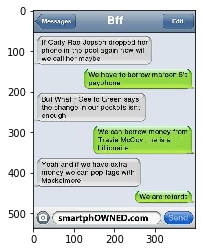

In [2]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

custom_oem_psm_config = r'--oem 2 --psm 6'
plt.imshow(Image.open(DATA_DIR+"Pins/0a7a6e5712496c313b9d3325cbc70ed5.jpg"))
print(pytesseract.image_to_string(DATA_DIR+"Pins/0a7a6e5712496c313b9d3325cbc70ed5.jpg"))

6
WAFFLES!




PNT MAKIN’


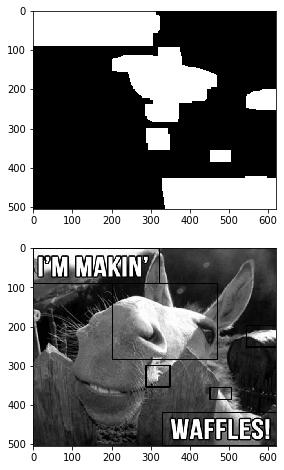

IM MAKIN


In [218]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# meme="0a7a6e5712496c313b9d3325cbc70ed5.jpg"
meme="0a03eb3038727665b3250741ad46bfc3.jpg"

fig=plt.figure(figsize=(8,8))

def ocr_ready(image):
    orig_img=cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    x1 = 10
    y1 = 6
    #img=cv2.resize(img, (256,256),  interpolation = cv2.INTER_CUBIC) 
    ret, img=cv2.threshold(orig_img, 250, 255, cv2.THRESH_BINARY_INV)
    #cv2.rectangle(img, (10, 15), (295, 78), (0, 255, 0), 2)
    kernel = np.ones((3,2),np.uint8)
    #img = cv2.erode(img,kernel,iterations = 1)
    #img = cv2.dilate(img,kernel,iterations = 1)
    img=cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    #img=cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    ret, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (x1, y1))
    dilation = cv2.dilate(thresh1, rect_kernel, iterations=6)
    fig.add_subplot(2,1,1)
    plt.imshow(dilation, cmap=plt.cm.gist_gray)
    
    _, contours, _ = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(orig_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        print(pytesseract.image_to_string(img[y:y+h, x:x+w]))
    fig.add_subplot(2,1,2)
    plt.imshow(orig_img, cmap=plt.cm.gist_gray)
    plt.show()
    custom_oem_psm_config = r'--oem 1 --psm 8'
    print(pytesseract.image_to_string(img[15:78, 10:295]))
    #print(pytesseract.image_to_string(img, lang="eng", config=custom_oem_psm_config))

ocr_ready(DATA_DIR+"Pins/"+meme)